1. 防止过拟合有哪些方法
    - 使用正则化方法(L1, L2 正则化) 通过正则项 来降低 算法的复杂度
    - 更优质的数据
2. 使用逻辑回归（Logistic Regression）对鸢尾花数据（多分类问题）进行预测，可以直接使用 sklearn 中 LR 方法，并尝试使用不同的参数，包括正则化的方法，正项项系数，求解优化器，以及将二分类模型转化为多分类模型的方法。


In [24]:
%matplotlib inline

In [25]:
import seaborn as sns

In [11]:
from sklearn.datasets import load_iris

In [50]:
import pandas as pd
# 绘制sigmoid 曲线
import matplotlib.pyplot as plt

In [51]:
iris_data = load_iris().data

In [52]:
y = load_iris().target

In [54]:
iris_data, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [55]:
iris_data.shape

(150, 4)

In [66]:
X = [x[0] for x in iris_data]
Y = [y[1] for y in iris_data]

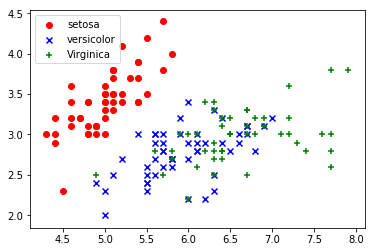

In [68]:
# plt.scatter(X, Y, c=y, marker='x')
plt.scatter(X[:50], Y[:50], color='red', marker='o', label='setosa') #前50个样本
plt.scatter(X[50:100], Y[50:100], color='blue', marker='x', label='versicolor') #中间50个
plt.scatter(X[100:], Y[100:],color='green', marker='+', label='Virginica') #后50个样本
plt.legend(loc=2) #左上角
plt.show()

In [37]:
df = pd.DataFrame(data=iris_data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

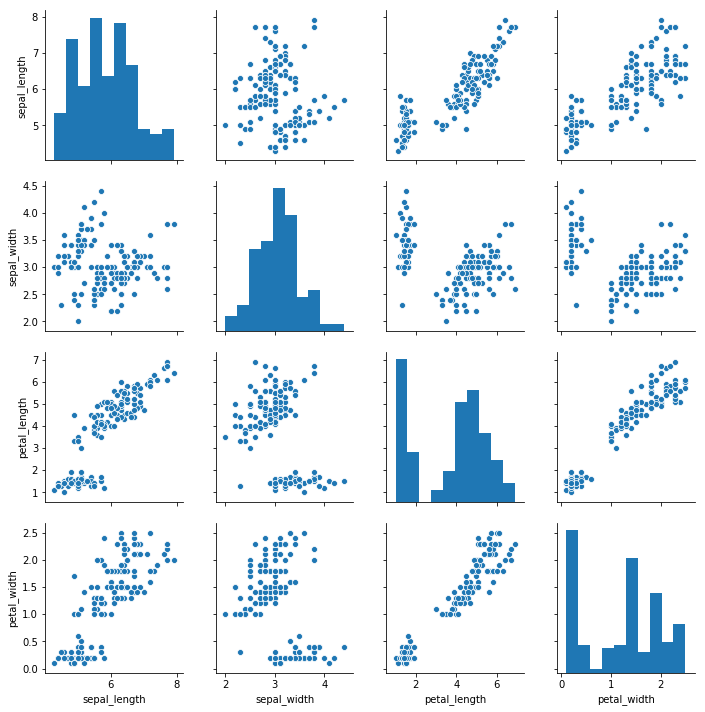

In [39]:
sns.pairplot(df) 

- 逻辑回归函数
$g(z) = \frac{1}{1+e^(-z)}$
- paython 实现

In [40]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

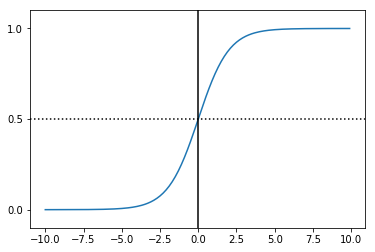

In [49]:
x = np.arange(-10, 10, 0.1)
h = sigmoid(x)
plt.plot(x, h)
plt.axvline(0, 0, color='k') # 坐标轴上添加一条竖直的线(0位置)
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')  
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])  #y轴标度
plt.ylim(-0.1, 1.1)       #y轴范围
plt.show()  

- 逻辑回归的代价函数
$J(\theta) = \frac{1}{m}\sum_{i=1}^m cost(h_\theta(x^{(i)}) - y^{(i)})^2$
- 
$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})))]$
###  python 实现

In [20]:
def cost(X, y, theta):
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / len(X)

- 正则化的逻辑回归的代价函数
$J(\theta) = \frac{1}{m}\sum_{i=1}^m[-y^{(i)}\log(h_\theta(x^{(i)})) - (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})))] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2 $
### Python 实现

In [21]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    fist = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply(1 -y, np.log(1 - sigmoid(X*theta.T)))
    reg = (learningRate / (2 * len(X)) * np.sum(np.power(theta[:, 1:theta.shape[1]], 2)))
    return np.sum(first - second) / len(X) + reg
           

### 逻辑回归分析 实现(一)

In [69]:
from sklearn.linear_model import LogisticRegression

In [73]:
X = X = iris_data[:, :2]
Y = load_iris().target

In [79]:
# 逻辑回归模型
lr = LogisticRegression()
lr.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
#meshgrid函数生成两个网格矩阵
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

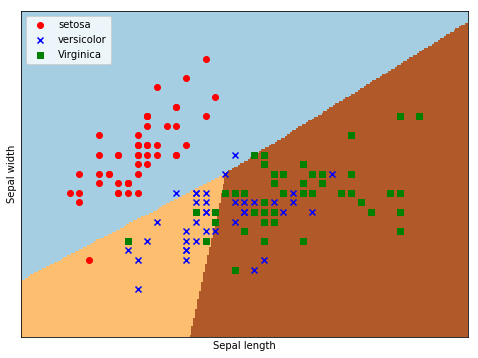

In [86]:
#pcolormesh函数将xx,yy两个网格矩阵和对应的预测结果Z绘制在图片上
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
#绘制散点图
plt.scatter(X[:50,0], X[:50,1], color='red',marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:,0], X[100:,1], color='green', marker='s', label='Virginica') 

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc=2) 
plt.show()

### 逻辑回归实现(二)


In [88]:
X = load_iris().data
Y = load_iris().target

#### 分隔出训练数据集与测试数据集

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.2, random_state=666)

In [91]:
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
train_score = lr.score(X_train, Y_train)
test_score = lr.score(X_test, Y_test)
print("训练数据集上的得分：{:.4f}".format(train_score))
print("测试数据集上的得分：{:.4f}".format(test_score))


训练数据集上的得分：0.9667
测试数据集上的得分：0.9333


我们发现算法在训练数据集上的得分较高，在测试数据集上的得分较低，这说明出现了过拟合。默认的参数已经使用了 L2 正则化，不过正则化的强度可能不够，因此我们使用网格搜索来寻找最佳超参数 C 的值。

In [93]:
from sklearn.model_selection import GridSearchCV
param_grid = {
     'C': [1e-2, 1e-3, 1, 10, 100, 1000, 1e4, 1e5, 1e6]
}
logreg = LogisticRegression(
    penalty='l2', solver='lbfgs', multi_class="multinomial")
clf = GridSearchCV(logreg, param_grid, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................................. C=1, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.001, 1, 10, 100, 1000, 10000.0, 100000.0, 1000000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [94]:
clf.best_params_

{'C': 10}

In [96]:
logreg = LogisticRegression(C=10, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, y_train)
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print("训练数据集上的得分：{:.4f}".format(train_score))
print("测试数据集上的得分：{:.4f}".format(test_score))

训练数据集上的得分：0.9833
测试数据集上的得分：1.0000


可以看到设置了 C 的值等于 10 以后，过拟合的效果已经明显提升了，训练数据集得分提高了，测试数据集的得分居然得到了 100%。



看一看 L2 正则化以后的权重

In [97]:
logreg.coef_

array([[-0.36060619,  1.97760932, -4.04471887, -1.99949965],
       [ 1.06581536, -0.12853623, -0.47126221, -2.02910387],
       [-0.70520917, -1.84907309,  4.51598108,  4.02860352]])

In [98]:
# 下面我们不妨用一下 L1 正则化。
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [1e-2, 1e-3, 1, 10, 100, 1000, 1e4, 1e5, 1e6]}
logreg = LogisticRegression(
    penalty='l1', solver='saga', multi_class="multinomial")
clf = GridSearchCV(logreg, param_grid, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/home/pawn/.pyenv/versions/3.6.0/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/pawn/.pyenv/versions/3.6.0/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/pawn/.pyenv/versions/3.6.0/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/pawn/.pyenv/versions/3.6.0/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the c

[CV] ....................................... C=100000.0, total=   0.0s
[CV] C=100000.0 ......................................................
[CV] ....................................... C=100000.0, total=   0.0s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.0s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.0s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.0s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.0s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.0s


/home/pawn/.pyenv/versions/3.6.0/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/pawn/.pyenv/versions/3.6.0/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/pawn/.pyenv/versions/3.6.0/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/pawn/.pyenv/versions/3.6.0/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/pawn/.pyenv/versions/3.6.0/env

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.001, 1, 10, 100, 1000, 10000.0, 100000.0, 1000000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [99]:
clf.best_params_

{'C': 1}

In [100]:
logreg = LogisticRegression(
    C=1, penalty='l1', solver='saga', multi_class='multinomial')
logreg.fit(X_train, y_train)
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print("训练数据集上的得分：{:.4f}".format(train_score))
print("测试数据集上的得分：{:.4f}".format(test_score))

训练数据集上的得分：0.9667
测试数据集上的得分：1.0000


/home/pawn/.pyenv/versions/3.6.0/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [101]:
logreg.coef_

array([[ 0.14294356,  2.23918642, -2.63842424, -0.20397519],
       [ 0.        ,  0.        ,  0.        , -0.15257737],
       [-2.18120537, -1.53311331,  3.21416128,  2.72289458]])

可以看出使用 L1 正则化的效果没有使用 L2 好，其实很好理解，L1 正则化有特征选择的功能，本来鸢尾花这个数据集的特征就只有 4 个，再稀疏化的意义不大。

### 逻辑回归实现(骚气版)

In [103]:
X, y = load_iris(return_X_y=True)

In [104]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
# 随机划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [106]:
clf = LogisticRegression(random_state=0, penalty='l2', C=1.0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
y_pred = clf.predict(X_test)

In [108]:
print(accuracy_score(y_test, y_pred))

1.0
